# Files imported

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib.inline
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from pprint import pprint
import string
from sklearn.manifold import TSNE
from gensim.models import Word2Vec

#Predicting
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#Neural network
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import Dense,Flatten,Input,Dropout,GlobalMaxPool1D,Conv1D
from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer,text_to_word_sequence
from pprint import pprint

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Opening file in pandas DataFrame.

In [2]:
# Training data file.
data=pd.read_csv(r'C:\Users\Dell\Desktop\Machine Learning\Project\train.csv')
data=data.iloc[0:500,:]
data.drop('id',axis=1,inplace=True)
data.head(10)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0


In [3]:
# adding a clean column
data['clean']=0
Col=["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

data['clean'] = 1-data[Col].max(axis=1)

In [4]:
# Testing data file.
test=pd.read_csv(r'C:\Users\Dell\Desktop\Machine Learning\Project\test.csv')
test=test.iloc[0:500,:]
test.drop('id',axis=1,inplace=True)
#test.head(2)

Creating new column containing number of character in each comment.

In [5]:
# Character length for each comment
data['char_length']=data['comment_text'].apply(len)

Creating a new column containing number of words in each comment.

In [6]:
# Word length for sentence
def word_tokenize(sent):
    return len(nltk.word_tokenize(sent))
data['word_length']=data['comment_text'].apply(word_tokenize)

## Preprocessing

**Punctuations we intend to remove from comments. These are contained in string package of Python.**

In [7]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


**Removing non-alphanumeric symbols like '\n','\t',etc.**

In [8]:
# Removes non-alphanumeric symbols like \n ,
import re
def strip_symbols(text):
    return ' '.join(re.compile(r'\W+').split(text)) 

# W+ matches any non-alphanumeric char
# re.compile() converts string to regular expression object
# .split(text) splits 

In [9]:
# Example
strip_symbols('I\n \\ Can, mrd can_ make 8888 a new sentence!!!!!! #### rehrwYYY @Mr.R.')

'I Can mrd can_ make 8888 a new sentence rehrwYYY Mr R '

**Stop-words are words that occur frequently but carry negligible information. Example:'I','are','you',etc.**

**Below is the function to remove stop-words from the comments.**

In [10]:
# Function to remove stopwords from comments

def stop_word_removal(comment):
    stop_comment=[]
    nopunc=[]
    
    # Checking if the characters are punctions
    for char in comment:
        if char not in string.punctuation:
            nopunc.append(char)
    
            
    # Joining the characters again to form the string.
    nopunc = ''.join(nopunc) # .join() takes a list of things to join with the string

    # Removing the stopwords
    for word in nopunc.split(' '):
        if word.lower() not in stopwords.words('english'):
            stop_comment.append(word.lower())
    return ' '.join(stop_comment)


In [11]:
stop_word_removal('I\n Can, mrd can_ make 8888 a new sentence!!!!!! #### rehrwYYY @Mr.R.')

'i\n mrd make 8888 new sentence  rehrwyyy mrr'

**The process of stemming of words is to reduce them to their root. Example:Stem word of 'listing' is 'list' and of 'commited' is 'commit'.**

**Below is the function to stem the comments.**

In [12]:
# Function to stem the comments
def stem(text):
    text = text.split()
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in text]
    text = " ".join(stemmed_words)
    return text

In [13]:
# Example
stem('Example sentence to displays stemming of sentences.')

'exampl sentenc to display stem of sentences.'

 **Applying preprocessing to training data.**

In [14]:
# Creating new columns which contains comments without non-alphanumeric char
data['comment-stop']=data['comment_text'].apply(strip_symbols)

# Removing stop words
data['comment-stop']=data['comment-stop'].apply(stop_word_removal)

# Normalizing=Converting to lowercase
data['comment-stop']=data['comment-stop'].apply(lambda x: x.lower())

# Stemming comments
data['comment-stem']=data['comment-stop'].apply(stem)


In [15]:
data.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean,char_length,word_length,comment-stop,comment-stem
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1,264,49,explanation edits made username hardcore metal...,explan edit made usernam hardcor metallica fan...
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1,112,27,aww matches background colour seemingly stuck ...,aww match background colour seem stuck thank t...
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1,233,48,hey man really trying edit war guy constantly ...,hey man realli tri edit war guy constant remov...
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1,622,128,make real suggestions improvement wondered se...,make real suggest improv wonder section statis...
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1,67,18,sir hero chance remember page,sir hero chanc rememb page


**Applying preprocessing to the testing data.**

In [16]:
# Creating new columns which contains comments without non-alphanumeric char
test['comment-stop']=test['comment_text'].apply(strip_symbols)

# Removing stop words
test['comment-stop']=test['comment-stop'].apply(stop_word_removal)

# Normalizing=Converting to lowercase
test['comment-stop']=test['comment-stop'].apply(lambda x: x.lower())

# Stemming comments
test['comment-stem']=test['comment-stop'].apply(stem)


## Predicting

**NOTE : TfidfVectorizer = CountVectorizer followed by TfidfTransformer**

**Comparing number of unique words in unclean, clean and stemmed comments.**

In [17]:
Col=["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

In [18]:
# Unique words in unclean comments

x_stem=data['comment_text']
vector_stem=CountVectorizer()
transform_stem=vector_stem.fit_transform(x_stem)
print(transform_stem.shape) # rowsXwords 

#tfidf transform
tf_stem=TfidfTransformer()
tf_transform_stem=tf_stem.fit_transform(transform_stem)
print(tf_transform_stem.shape) # rowsXwords 

(500, 5796)
(500, 5796)


In [19]:
# Unique words in clean comments

x_stem=data['comment-stop']
vector_stem=CountVectorizer()
transform_stem=vector_stem.fit_transform(x_stem)
print(transform_stem.shape) # rowsXwords 

#tfidf transform
tf_stem=TfidfTransformer()
tf_transform_stem=tf_stem.fit_transform(transform_stem)
print(tf_transform_stem.shape) # rowsXwords 

(500, 5659)
(500, 5659)


In [20]:
# Unique words in stem comments

x_stem=data['comment-stem']

# Countvectorizer
vector_stem=CountVectorizer()
transform_stem=vector_stem.fit_transform(x_stem)
print(transform_stem.shape) # rowsXwords 

#Tfidf transform
tf_stem=TfidfTransformer()
tf_transform_stem=tf_stem.fit_transform(transform_stem)
print(tf_transform_stem.shape) # rowsXwords 


(500, 4387)
(500, 4387)


**We can see from above results that cleaning and stemming comments helps in reducing the number of unique words.**

**We can write unique stemmed words to a csv file.**

In [21]:
# words=transform_stem
# #words.columns=list_of_words

# df_word=pd.DataFrame(words.todense())
# df_word.columns=vector_stem.get_feature_names() # assigning column name based on the corresponding word

# df_word.to_csv('Words.csv',index=False)
# #df_word # Dataframe column contains word in sparse vector.

**Predicting on testing data.**

In [22]:
test_stem=[test['comment-stop'][0]]

test_vector_stem=CountVectorizer()
test_transform_stem=test_vector_stem.fit_transform(test_stem)

test_tf_stem=TfidfTransformer()
test_tf_transform_stem=test_tf_stem.fit_transform(test_transform_stem)
print(test_tf_transform_stem.shape) # rowsXwords 

(1, 39)


### Predicting on stemmed comments.

### Logistic Regression

In [23]:
# Logistic Regression
lr=LogisticRegression()

# print('Bag of words:\n')
# for target in Col:
#     score=cross_val_score(lr,transform_stem.toarray(),data[target],cv=2)
#     print(target,':',score.mean())
    
print('\nTfidf:\n')
for target in Col:
    score_tf=cross_val_score(lr,tf_transform_stem.toarray(),data[target],cv=2)
    print(target,':',score_tf.mean())


Tfidf:

toxic : 0.9020064321029136
severe_toxic : 0.992
obscene : 0.9460071361141779
threat : 0.996
insult : 0.9460071361141779
identity_hate : 0.988


**Predicting on an untrained example comment.**

In [24]:
# The example comment we are testing on.
# The comment no. is behind by two counts compared to the excel sheet.
print([test['comment-stem'][59]])

['fuck anti semit cunt']


In [25]:
for target in Col:
    lr.fit(transform_stem,data[target])
    print(target,':',lr.predict(vector_stem.transform([test['comment-stem'][59]])))

toxic : [1]
severe_toxic : [0]
obscene : [1]
threat : [0]
insult : [0]
identity_hate : [0]


### Naive Bayes

In [26]:
# Naive bayes on stemmed comments data
naive=MultinomialNB()

# print('Bag of words:\n')
# for target in Col:
#     score=cross_val_score(naive,transform_stem.toarray(),data[target],cv=2)
#     print(target,':',score.mean())
    
print('\nTfidf:\n')
for target in Col:
    score_tf=cross_val_score(naive,tf_transform_stem.toarray(),data[target],cv=2)
    print(target,':',score_tf.mean())


Tfidf:

toxic : 0.9020064321029136
severe_toxic : 0.992
obscene : 0.9460071361141779
threat : 0.996
insult : 0.9460071361141779
identity_hate : 0.988


**Predicting on an untrained example comment.**

In [27]:
for target in Col:
    naive.fit(transform_stem,data[target])
    print(target,':',naive.predict(vector_stem.transform([test['comment-stem'][99]])))

toxic : [1]
severe_toxic : [0]
obscene : [0]
threat : [0]
insult : [0]
identity_hate : [0]


### SVM

In [28]:
# Using best result for hyperparamter from gridsearchCV.

support=svm.SVC(kernel='linear',C=3,random_state=27)

# print('Bag of words:\n')
# for target in Col:
#     score=cross_val_score(support,transform_stem.toarray(),data[target],cv=2)
#     print(target,':',score.mean())
    
print('\nTfidf:\n')
for target in Col:
    score_tf=cross_val_score(support,tf_transform_stem.toarray(),data[target],cv=2)
    print(target,':',score_tf.mean())



Tfidf:

toxic : 0.9199987199795197
severe_toxic : 0.992
obscene : 0.9580073281172499
threat : 0.996
insult : 0.9500072001152018
identity_hate : 0.986


**Predicting on an untrained example comment.**

In [29]:
for target in Col:
    support.fit(transform_stem,data[target])
    print(target,':',support.predict(vector_stem.transform([test['comment-stem'][59]])))

toxic : [1]
severe_toxic : [0]
obscene : [1]
threat : [0]
insult : [0]
identity_hate : [0]


#### Just to check,predicted on comment 6 of data. SVM does better than Naive Bayes clearly.

In [30]:
for target in Col:
    support.fit(transform_stem,data[target])
    print(target,':',support.predict(vector_stem.transform([data['comment-stem'][6]])))

toxic : [1]
severe_toxic : [1]
obscene : [1]
threat : [0]
insult : [1]
identity_hate : [0]


### KNN

In [31]:
# KNN
knn=KNeighborsClassifier(n_neighbors=5,algorithm='auto')

Col=["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

# print('Bag of words:\n')
# for target in Col:
#     score=cross_val_score(knn,transform_stem.toarray(),data[target],cv=2)
#     print(target,':',score.mean())
    
print('\nTfidf:\n')
for target in Col:
    score_tf=cross_val_score(knn,tf_transform_stem.toarray(),data[target],cv=2)
    print(target,':',score_tf.mean())


Tfidf:

toxic : 0.9280148482375719
severe_toxic : 0.992
obscene : 0.966007456119298
threat : 0.996
insult : 0.960015360245764
identity_hate : 0.988


**Predicting on an untrained example comment.**

In [32]:
for target in Col:
    knn.fit(transform_stem,data[target])
    print(target,':',knn.predict(vector_stem.transform([test['comment-stem'][59]])))

toxic : [0]
severe_toxic : [0]
obscene : [0]
threat : [0]
insult : [0]
identity_hate : [0]


**Saving all the results in a dataframe.**

In [33]:
Col=["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
Index=['Logistic','Naive','SVM','knn']
df_count=pd.DataFrame(columns=Col,index=Index)

In [34]:
Logistic=LogisticRegression()
Naive=MultinomialNB()
SVM=svm.SVC(kernel='linear',C=3,random_state=27)
knn=KNeighborsClassifier(n_neighbors=5,algorithm='auto')

algo_ref=[Logistic,Naive,SVM,knn]
algo_name=['Logistic','Naive','SVM','knn']
algos=[lr,naive,support,knn]

for index in range(len(algo_name)):
    for i in Col:
        score_tf_all={}
        score_count=cross_val_score(algo_ref[index],tf_transform_stem.toarray(),data[i],cv=2)
        df_count.loc[algo_name[index]][i]=score_count.mean()

print('TfidfVect:')
print(df_count)

TfidfVect:
             toxic severe_toxic   obscene threat    insult identity_hate
Logistic  0.902006        0.992  0.946007  0.996  0.946007         0.988
Naive     0.902006        0.992  0.946007  0.996  0.946007         0.988
SVM       0.919999        0.992  0.958007  0.996  0.950007         0.986
knn       0.928015        0.992  0.966007  0.996  0.960015         0.988


## Neural Network

In [35]:
# Creating object of Keras Tokeniser().
tokenizer=Tokenizer()
# Fit this object on stemming data.
tokenizer.fit_on_texts(x_stem)
# Saving the one-hot encoded format of words in a list.
sequence=tokenizer.texts_to_sequences(x_stem) # splits comments into a list of words(replaced by their index)

#tokenizer.fit_on_texts(list(x_unclean))
#sequence=tokenizer.texts_to_sequences(x_unclean)
#pprint(tokenizer.word_index)

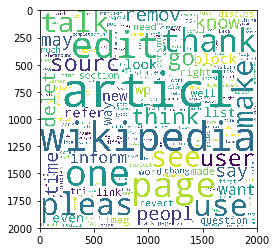

In [36]:
# Creating a wordcloud in which words are displayed in different sizes depending on their frequency 
# of occurence in the complete corpus.
from wordcloud import WordCloud
cloud=WordCloud(background_color='white',width=2000,height=2000).generate(' '.join(x_stem))
plt.imshow(cloud)

In [37]:
total_words=len(tokenizer.word_index)
print('Total unique words:',total_words) # total unique words
# **total unique words will go as input to embedding layer**

length_comment=[]
comment=x_stem

# Finding the maximum length comment.
for row in comment:
    length_comment.append(len(row.split(' ')))
max_length_comment=max(length_comment)
print('Max length comment:',max_length_comment) # max length of comment

Total unique words: 4711
Max length comment: 757


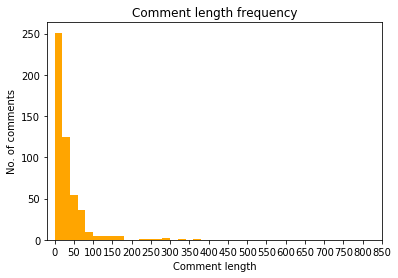

From above graph we can deduce that most comments have length about 0-50 words


In [38]:
# Saving comment length in a list.
totalNumWords = [len(comment) for comment in sequence]
# Plotting a histogram
plt.hist(totalNumWords,bins = range(0,400,20),color='orange')
plt.yticks(range(0,300,50))
plt.xticks(range(0,900,50))
plt.title('Comment length frequency')
plt.ylabel('No. of comments')
plt.xlabel('Comment length')
plt.show()
print('From above graph we can deduce that most comments have length about 0-50 words')

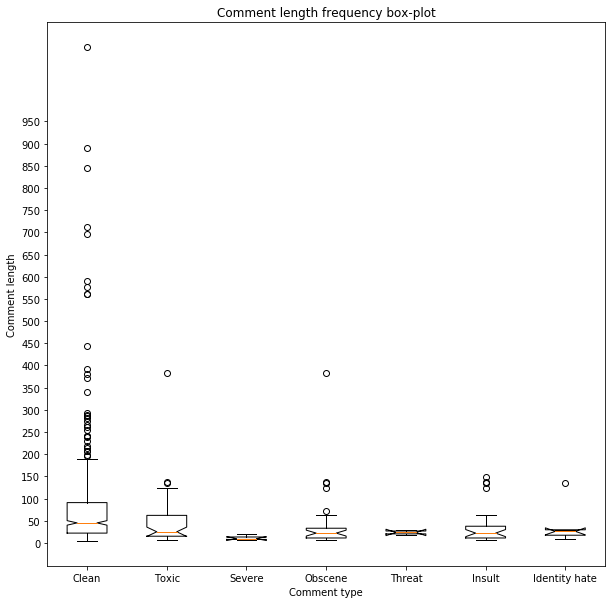

Clean comments tend to be a bit longer.


In [49]:
# Creating a box plot to compare the comment length according to specific target columns.
toxic=(data['toxic']==1)
clean=(data['clean']==1)
severe=(data['severe_toxic']==1)
obscene=(data['obscene']==1)
threat=(data['threat']==1)
insult=(data['insult']==1)
identity=(data['identity_hate']==1)

clean_len=data.loc[clean]['word_length']
toxic_len=data.loc[toxic]['word_length']
severe_len=data.loc[severe]['word_length']
obscene_len=data.loc[obscene]['word_length']
threat_len=data.loc[threat]['word_length']
insult_len=data.loc[insult]['word_length']
identity_len=data.loc[identity]['word_length']

plt.boxplot([clean_len,toxic_len,severe_len,obscene_len,threat_len,insult_len,identity_len],notch=True,labels=['Clean','Toxic','Severe','Obscene','Threat','Insult','Identity hate'])
plt.yticks(range(0,1000,50))
plt.title('Comment length frequency box-plot')
plt.xlabel('Comment type')
plt.ylabel('Comment length')
plt.show()

print('Clean comments tend to be a bit longer.')

In [40]:
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = data[list_classes].values

In [41]:
maxlen = max_length_comment
pad_doc = pad_sequences(sequence, maxlen=maxlen) # padding all comments to max comment length

inp = Input(shape=(maxlen, )) # Input layer
embed_size = 5
embed=Embedding(total_words+1, embed_size)(inp)
# input dimension=max_features, it is same as the no. of unique words in corpus
# output dimension/vector space dimension=embed_size
# output dimension is hyperparameter

x=Conv1D(filters=60,kernel_size=2,activation='relu')(embed) # 2nd layer;Convulation layer
#kernel-size=size of conv window
x = GlobalMaxPool1D()(x) # GlobalMaxPool1D Takes no argument
#x=GlobalAvgPool1D()(x)
x = Dropout(0.1)(x) # hyperparameter
x = Dense(50, activation="relu")(x) # 3rd layer
x = Dropout(0.1)(x) # hyperparameter
x = Dense(6, activation="softmax")(x) # output layer

model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
batch_size = 32
epochs = 5
model.fit(pad_doc,y, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Train on 450 samples, validate on 50 samples
Epoch 1/5
450/450 [==============================] - 4s 9ms/step - loss: 0.2454 - acc: 0.9596 - val_loss: 0.2121 - val_acc: 0.9800
Epoch 2/5
450/450 [==============================] - 2s 4ms/step - loss: 0.2421 - acc: 0.9596 - val_loss: 0.2106 - val_acc: 0.9800
Epoch 3/5
450/450 [==============================] - 2s 4ms/step - loss: 0.2393 - acc: 0.9596 - val_loss: 0.2098 - val_acc: 0.9800
Epoch 4/5
450/450 [==============================] - 2s 4ms/step - loss: 0.2375 - acc: 0.9596 - val_loss: 0.2095 - val_acc: 0.9800
Epoch 5/5
450/450 [==============================] - 2s 4ms/step - loss: 0.2361 - acc: 0.9596 - val_loss: 0.2096 - val_acc: 0.9800


In [42]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 757)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 757, 5)            23560     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 756, 60)           660       
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 60)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                3050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
__________

In [43]:
data['token sent']=[sent.split() for sent in data['comment-stem']] #splitting words bcuz word2vec accepts in list

In [44]:
word_model=Word2Vec(data['token sent'],size=10,min_count=2)
X=word_model[word_model.wv.vocab]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [45]:
pprint(word_model.most_similar('wikipedia'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('say', 0.9718838930130005),
 ('page', 0.9633400440216064),
 ('person', 0.9627944231033325),
 ('even', 0.9596498012542725),
 ('think', 0.9578804969787598),
 ('also', 0.9577710032463074),
 ('fuck', 0.9546802043914795),
 ('articl', 0.9476175904273987),
 ('one', 0.9459682703018188),
 ('user', 0.9454864263534546)]


In [46]:
#To visualise the word embeddings.
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

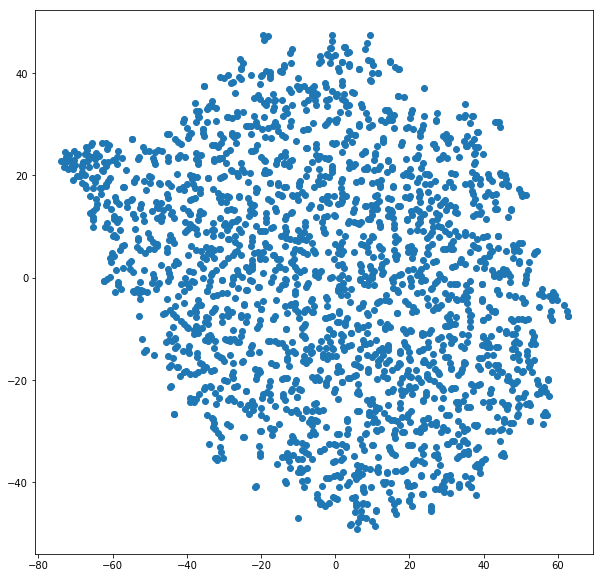

In [47]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()